In [5]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
model = AutoModel.from_pretrained('facebook/dinov2-base').to("cuda")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs.to("cuda"))
last_hidden_states = outputs.last_hidden_state

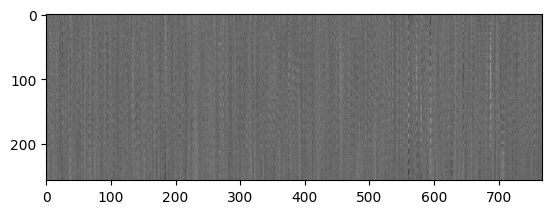

In [6]:
import matplotlib.pyplot as plt

plt.imshow(last_hidden_states[0].cpu().detach().numpy(), cmap='gray')

In [14]:
len(last_hidden_states[0].cpu().detach().numpy().reshape(-1).tolist())

197376

In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
)

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-2B-Instruct",
#     torch_dtype=torch.bfloat16,
#     attn_implementation="flash_attention_2",
#     device_map="auto",
# )

# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

# The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

messages = [
    {
        "role": "police",
        "content": [
            {
                "type": "image",
                "image": "https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg",
            },
            {
                "type": "text",
                "text": "Describe this image. Take special account to the persons appearance and actions at the image, especially for disorderly conduct, fights, violences, thefts and etc."},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
Some parameters are on the meta device because they were offloaded to the cpu.
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 4b584872-af0a-47f5-9f1d-708bb85a7b18)')' thrown while requesting HEAD https://huggingface.co/Qwen/Qwen2-VL-2B-Instruct/resolve/main/preprocessor_config.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 8111c72c-1a82-44c6-80db-f3e0d061b727)')' thrown while requesting HEAD https://huggingface.co/Qwen/Qwen2-VL-2B-Instruct/resolve/main/processor_config.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 17461a33-1f01-4d44-877e-93d5aac8c300)')' thrown while requesting HEAD https://huggingface.co/Qwen/Qwen2-VL

['The image depicts a serene beach scene with a woman and a dog. The woman is sitting on the sand, smiling and engaging with the dog, who is sitting on the sand as well. The dog appears to be wearing a harness and is extending its front leg towards the woman, possibly in a high-five or a similar gesture. The woman is dressed in a plaid shirt and dark pants, and she has long hair. The background shows the ocean with gentle waves, and the sky is clear with a soft light, suggesting it might be early morning or late afternoon. The overall atmosphere is peaceful and joyful.']


In [8]:
messages = [
    {
        "role": "police",
        "content": [
            {
                "type": "image",
                "image": "https://avatars.mds.yandex.net/i?id=dcb05e72411fd95fd86ce491d34966ae859cd7c1-12610457-images-thumbs&n=13",
            },
            {
                "type": "text",
                "text": "Describe this image. Take special account to the persons appearance and actions at the image, especially for disorderly conduct, fights, violences, thefts and etc."},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

print(output_text)

['The image depicts a scene inside a grocery store. A person is standing in front of a display case, which appears to be filled with various packaged goods. The individual is wearing a plaid shirt and white pants, and they are holding a shopping cart. The display case is organized with neatly stacked items, and the person seems to be examining or selecting items from it.\n\nIn the background, there are other customers and staff members, indicating a busy store. Some of the customers are standing and talking, while others are walking or standing near the display case. The store has a modern design with bright lighting and a clean, organized layout.\n\nThere']
